In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('SampleSuperstore.xls')

In [2]:
#Tratando os dados
df.head() #verificando os dados
df = df.drop(['Row ID', 'Postal Code','Customer Name'], axis=1)

In [3]:
df.info() #verificando se há valores nulos e os tipos de dados
df.duplicated().sum() #verificando se existem duplicatas
df.drop_duplicates(inplace=True) #removendo duplicatas
df.describe()  # Resumo estatístico, para detectar possíveis outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   datetime64[ns]
 3   Ship Mode     9994 non-null   object        
 4   Customer ID   9994 non-null   object        
 5   Segment       9994 non-null   object        
 6   Country       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Region        9994 non-null   object        
 10  Product ID    9994 non-null   object        
 11  Category      9994 non-null   object        
 12  Sub-Category  9994 non-null   object        
 13  Product Name  9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:>

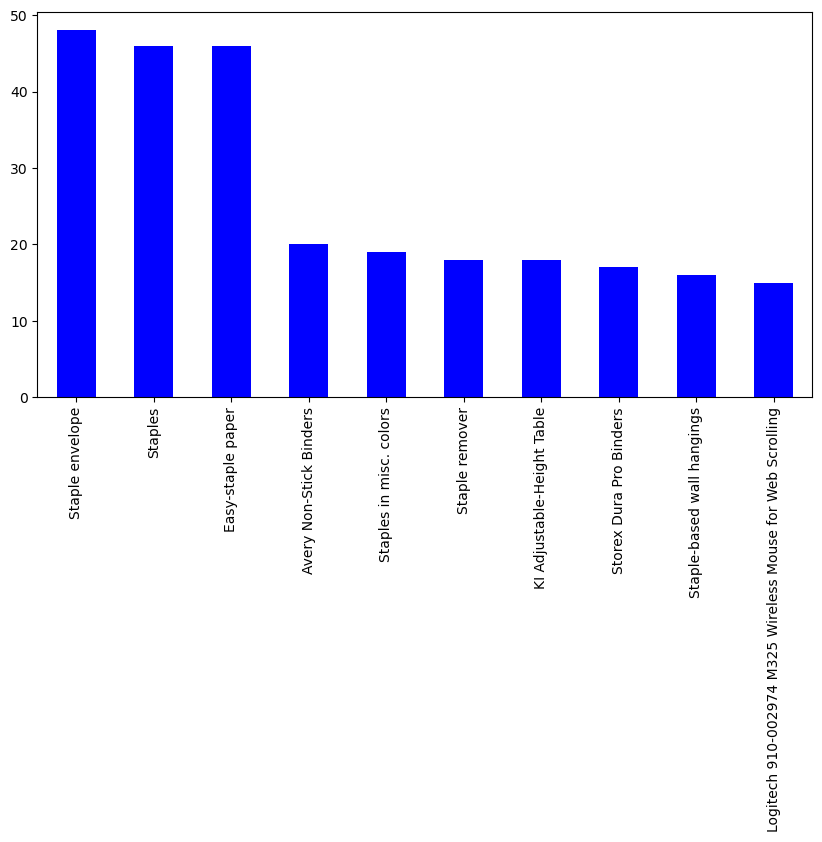

In [4]:
#analisando o produto mais vendido (Levando em consideração pessoas diferentes que compraram o mesmo produto)
df['Product Name'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='blue')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'KI Adjustable-Height Table'),
  Text(1, 0, 'Staple-based wall hangings'),
  Text(2, 0, 'Situations Contoured Folding Chairs, 4/Set'),
  Text(3, 0, 'Eldon Wave Desk Accessories'),
  Text(4, 0, 'Global High-Back Leather Tilter, Burgundy'),
  Text(5, 0, 'Staple envelope'),
  Text(6, 0, 'Easy-staple paper'),
  Text(7, 0, 'Staples'),
  Text(8, 0, 'Avery Non-Stick Binders'),
  Text(9, 0, 'Staples in misc. colors'),
  Text(10, 0, 'Logitech 910-002974 M325 Wireless Mouse for Web Scrolling'),
  Text(11, 0, 'Kingston Digital DataTraveler 16GB USB 2.0'),
  Text(12, 0, 'Logitech Desktop MK120 Mouse and keyboard Combo'),
  Text(13, 0, 'Geemarc AmpliPOWER60'),
  Text(14, 0, 'Maxell 4.7GB DVD-R')])

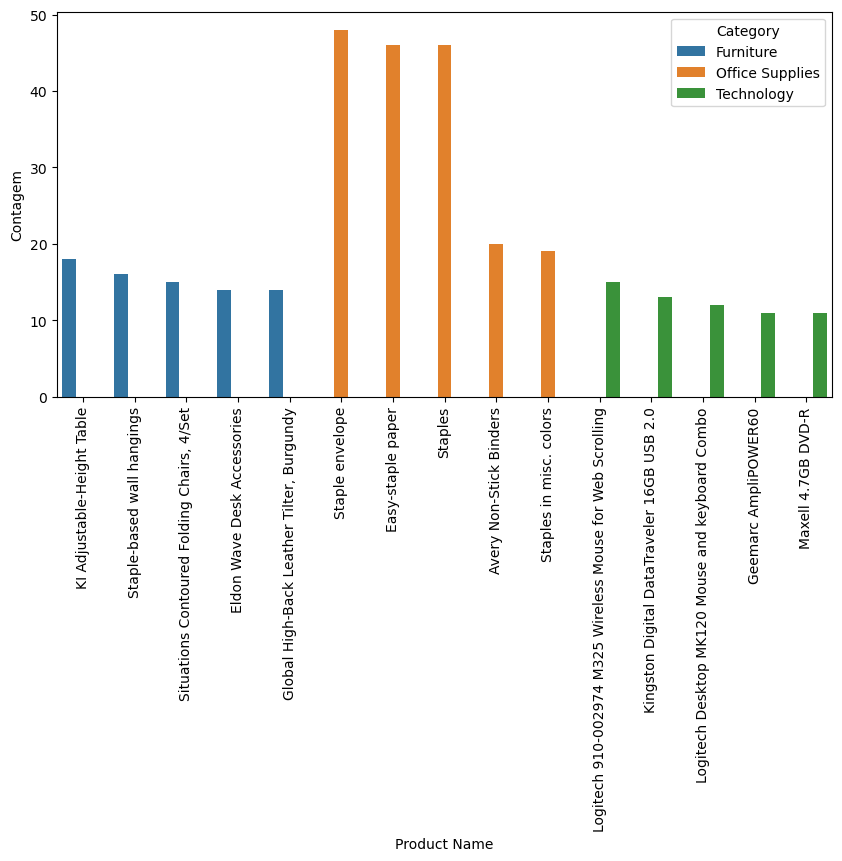

In [5]:
# analisando os produtos mais vendidos por categoria (Levando em consideração pessoas diferentes que compraram o mesmo produto)
tabelaaux = df.groupby('Category')['Product Name'].value_counts().groupby('Category').head(5).reset_index(name = 'Contagem')
plt.figure(figsize=(10,5))
sns.barplot(x='Product Name', y='Contagem', hue='Category', data=tabelaaux)
plt.xticks(rotation=90)



Análise de Desempenho por Categoria de Produto:

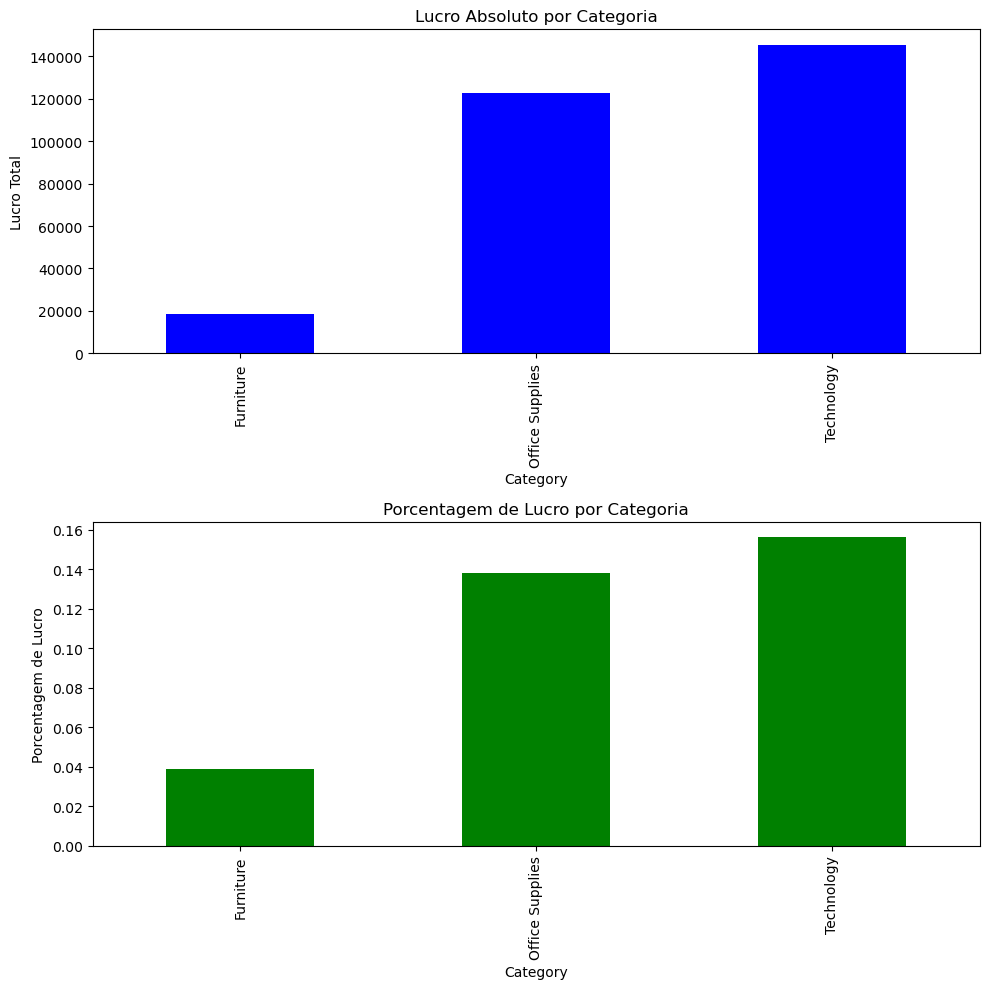

In [6]:
#Quais são as categorias de produtos que mais geram lucro? Quais geram menor lucro ou até prejuízo?

# Configurando a figura e os subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Gráfico 1: Lucro absoluto por categoria
df.groupby('Category')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Lucro Absoluto por Categoria')
axes[0].set_ylabel('Lucro Total')

# Gráfico 2: Lucro percentual médio por categoria
df['Porcentagem'] = df['Profit'] / df['Sales']  # Calculando a porcentagem de lucro
df.groupby('Category')['Porcentagem'].mean().sort_values().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Porcentagem de Lucro por Categoria')
axes[1].set_ylabel('Porcentagem de Lucro')

plt.tight_layout()
plt.show()

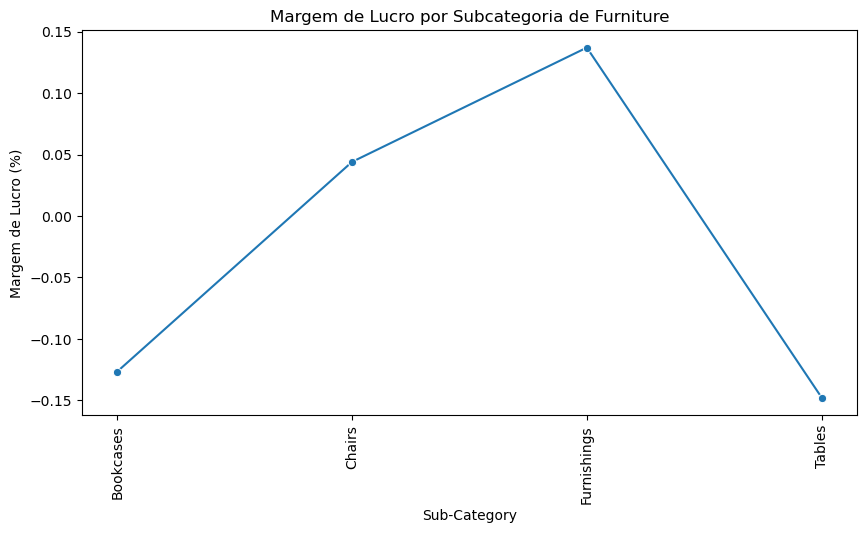

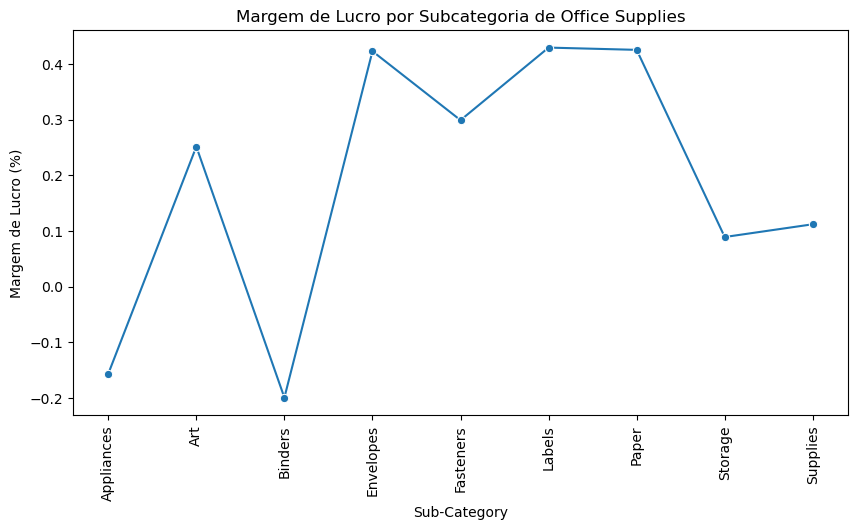

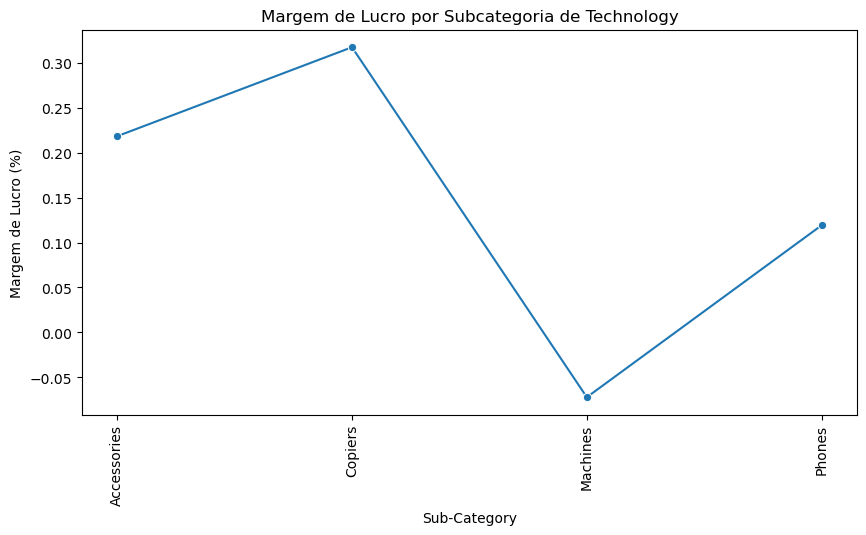

In [7]:
#Como a margem de lucro varia entre as subcategorias de cada categoria?
tabelaaux = df.groupby(['Category', 'Sub-Category'])['Porcentagem'].mean().reset_index()
categorias = df['Category'].unique()
for categoria in categorias:
    df_aux = tabelaaux[tabelaaux['Category'] == categoria]
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Sub-Category', y='Porcentagem', data=df_aux, marker='o')
    plt.title(f'Margem de Lucro por Subcategoria de {categoria}')
    plt.ylabel('Margem de Lucro (%)')
    plt.xticks(rotation=90)
    plt.show()

Eficiência nas Vendas e Descontos:

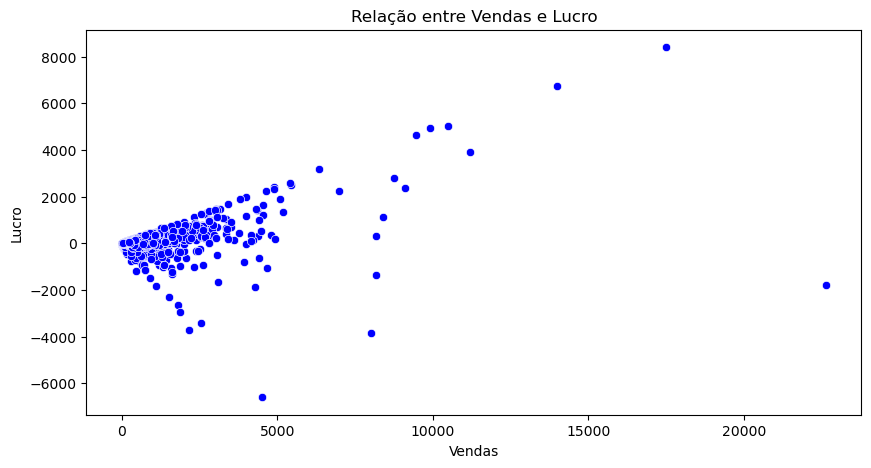

In [8]:
#Qual a relação entre as vendas e o lucro?
plt.figure(figsize=(10,5))
sns.scatterplot(x='Sales', y='Profit', data=df, color='blue')
plt.title('Relação entre Vendas e Lucro')
plt.xlabel('Vendas')
plt.ylabel('Lucro')
plt.show()



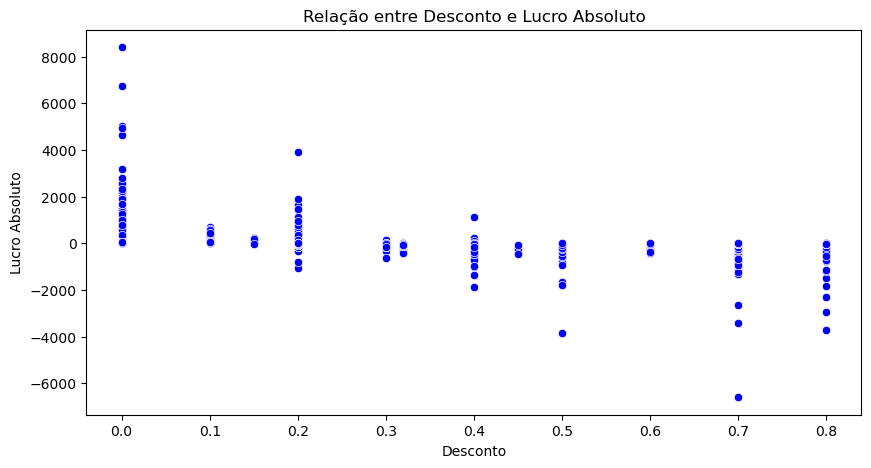

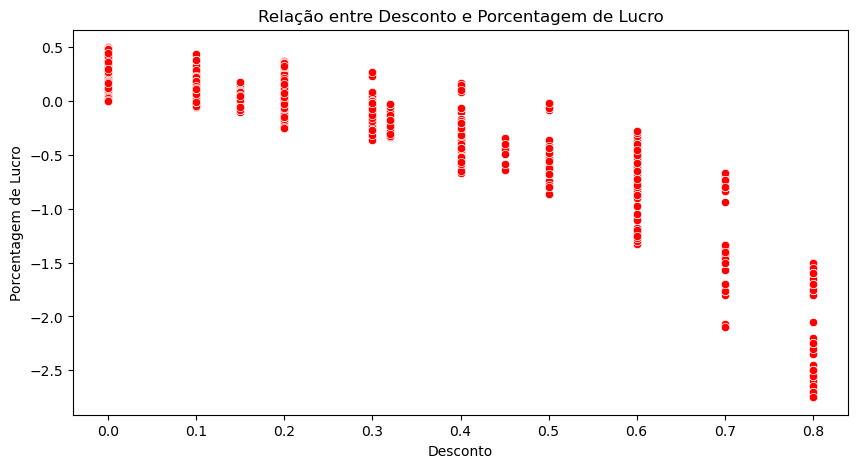

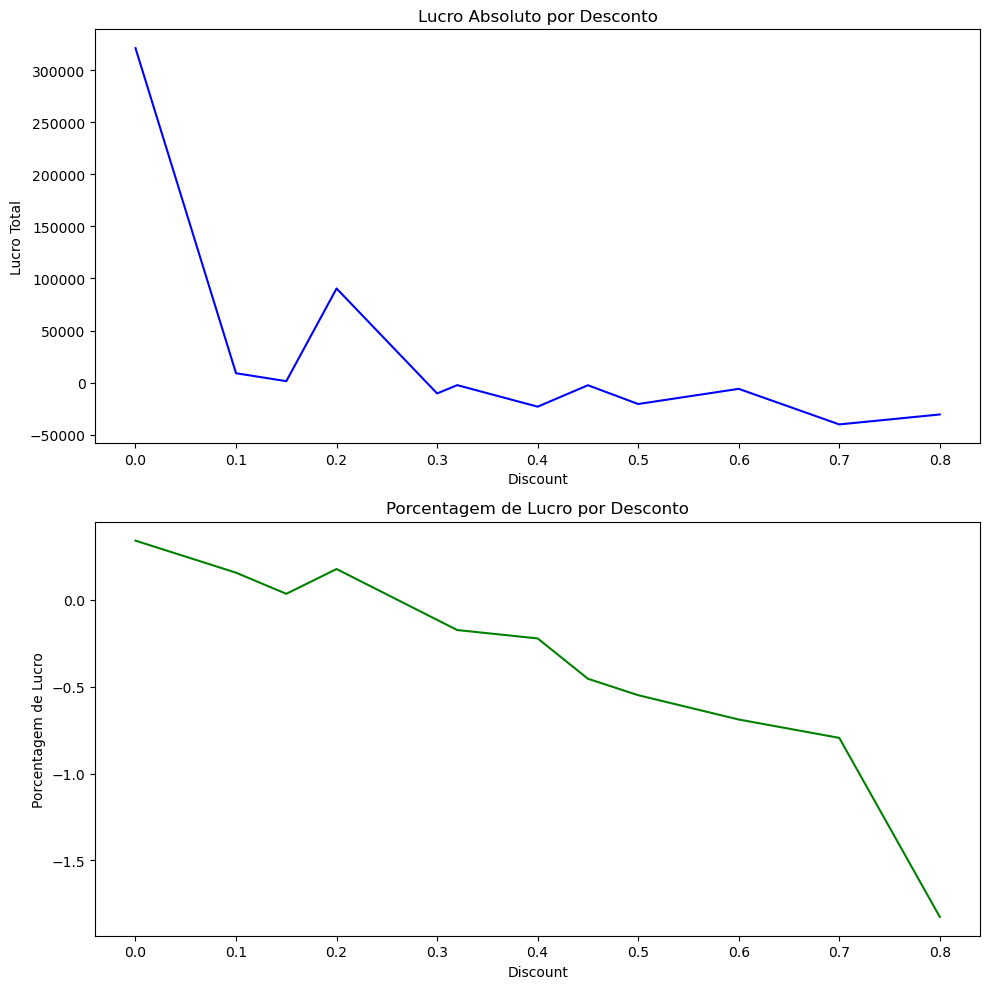

In [9]:
#Como os descontos oferecidos impactam o lucro? (absoluto e percentual)
# Gráfico 1: Relação entre Desconto e Lucro Absoluto
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Profit', data=df, color='blue')
plt.title('Relação entre Desconto e Lucro Absoluto')
plt.xlabel('Desconto')
plt.ylabel('Lucro Absoluto')
plt.show()

# Gráfico 2: Relação entre Desconto e Porcentagem de Lucro
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Porcentagem', data=df, color='red')
plt.title('Relação entre Desconto e Porcentagem de Lucro')
plt.xlabel('Desconto')
plt.ylabel('Porcentagem de Lucro')
plt.show()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Gráfico 3: Lucro total absoluto por desconto
df.groupby('Discount')['Profit'].sum().plot( ax=axes[0], color='blue')
axes[0].set_title('Lucro Absoluto por Desconto')
axes[0].set_ylabel('Lucro Total')

# Gráfico 4: Lucro percentual médio por desconto
df.groupby('Discount')['Porcentagem'].mean().plot( ax=axes[1], color='green')
axes[1].set_title('Porcentagem de Lucro por Desconto')
axes[1].set_ylabel('Porcentagem de Lucro')

plt.tight_layout()
plt.show()

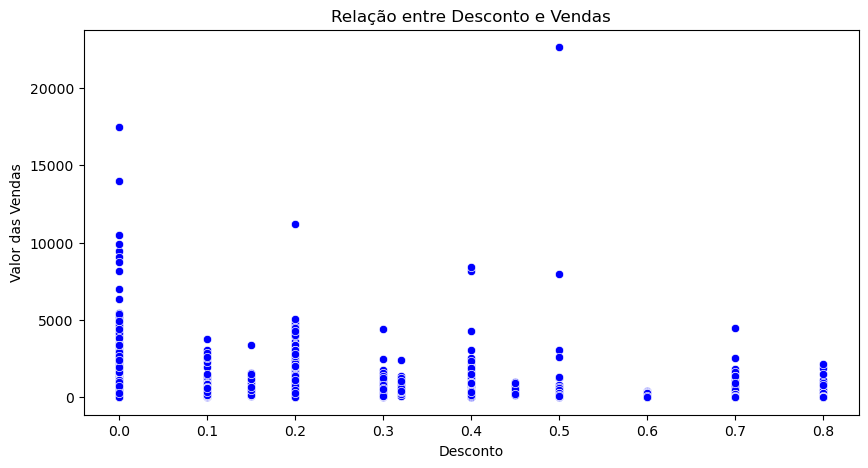

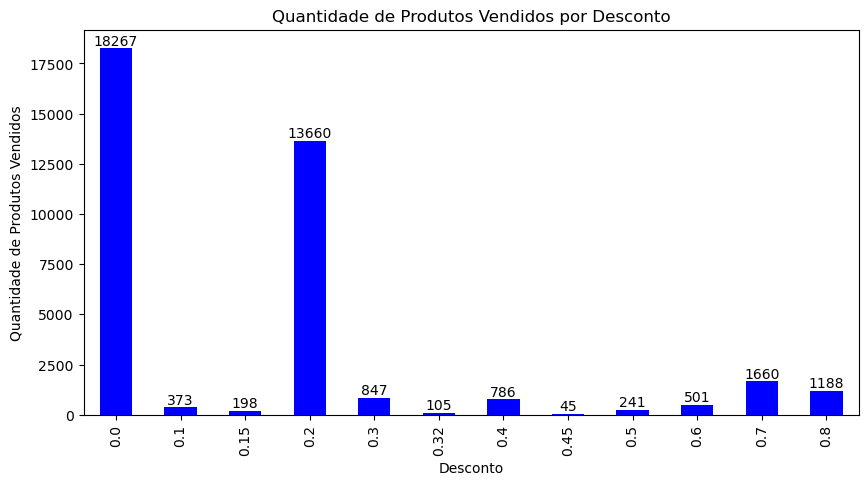

In [10]:
#Há uma correlação entre maiores descontos e maiores vendas?

#tamanho do desconto e o valor das vendas
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Sales', data=df, color='blue')
plt.title('Relação entre Desconto e Vendas')
plt.xlabel('Desconto')
plt.ylabel('Valor das Vendas')
plt.show()

#tamanho do desconto e a quantidade de produtos vendidos
quantidade_produtos = df.groupby('Discount')['Quantity'].sum()
ax = quantidade_produtos.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Quantidade de Produtos Vendidos por Desconto')
plt.xlabel('Desconto')
plt.ylabel('Quantidade de Produtos Vendidos')
ax.bar_label(ax.containers[0])
plt.show()


In [11]:
#Existe alguma subcategoria ou produto que está sendo vendido com desconto e gerando prejuízo constante?

# Subcategorias
tabelaSubCategorias = df[df['Discount'] > 0].groupby('Sub-Category')['Profit'].sum().reset_index()
sub_categoria_prejuizo = tabelaSubCategorias[tabelaSubCategorias['Profit'] < 0] #sub-categorias com desconto que geram prejuízo
print("Subcategorias que geram prejuízo:")
print(sub_categoria_prejuizo)

# Produtos
tabelaProdutos = df[df['Discount'] > 0].groupby('Product Name')['Profit'].sum().reset_index()
produto_prejuizo = tabelaProdutos[tabelaProdutos['Profit'] < 0] #produtos com desconto que geram prejuízo
print("\nProdutos que geram prejuízo:")
print(produto_prejuizo)


Subcategorias que geram prejuízo:
   Sub-Category      Profit
1    Appliances  -5045.7307
3       Binders  -9092.6874
4     Bookcases  -9548.2677
9   Furnishings  -3788.8253
11     Machines -23753.0654
14      Storage  -4249.3451
15     Supplies  -2907.4937
16       Tables -31001.7808

Produtos que geram prejuízo:
                                           Product Name     Profit
11                     12-1/2 Diameter Round Wall Clock   -23.9760
13       2300 Heavy-Duty Transfer File Systems by Perma    -2.7478
17    3.6 Cubic Foot Counter Height Office Refrigerator -1284.5432
18                             36X48 HARDFLOOR CHAIRMAT   -61.0518
19       3D Systems Cube Printer, 2nd Generation, White  -467.9964
...                                                 ...        ...
1646  Zebra GK420t Direct Thermal/Thermal Transfer P...  -938.2800
1649                         Zipper Ring Binder Pockets    -5.0856
1650                  i.Sound Portable Power - 8000 mAh   -60.4086
1653          

Análise de Segmentos de Clientes:

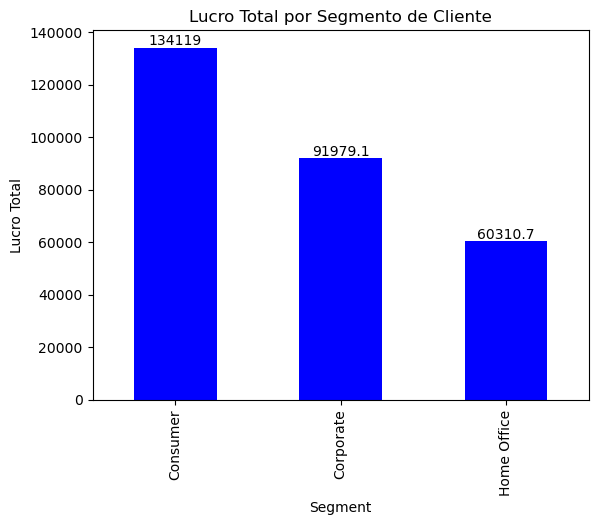

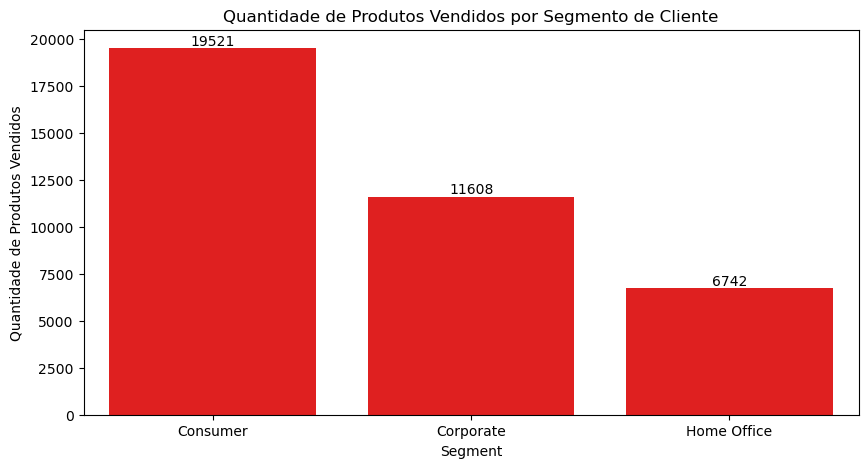

In [12]:
#Qual segmento de cliente (Consumer, Corporate, Home Office) gera o maior lucro?
ax = df.groupby('Segment')['Profit'].sum().plot(kind='bar', color='blue')
plt.title('Lucro Total por Segmento de Cliente')
plt.ylabel('Lucro Total')
ax.bar_label(ax.containers[0])
plt.show()

#Existe uma correlação entre o tipo de cliente (segmento) e a quantidade de produtos comprados?
tabelaSegmento = df.groupby('Segment')['Quantity'].sum().reset_index()
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Segment', y='Quantity', data=tabelaSegmento, color='red')
plt.title('Quantidade de Produtos Vendidos por Segmento de Cliente')
plt.ylabel('Quantidade de Produtos Vendidos')
ax.bar_label(ax.containers[0])
plt.show()

Eficiência da Logística:

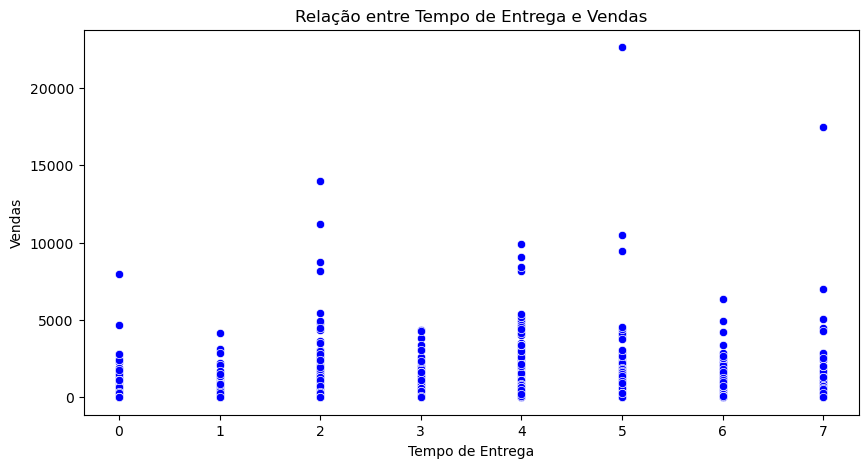

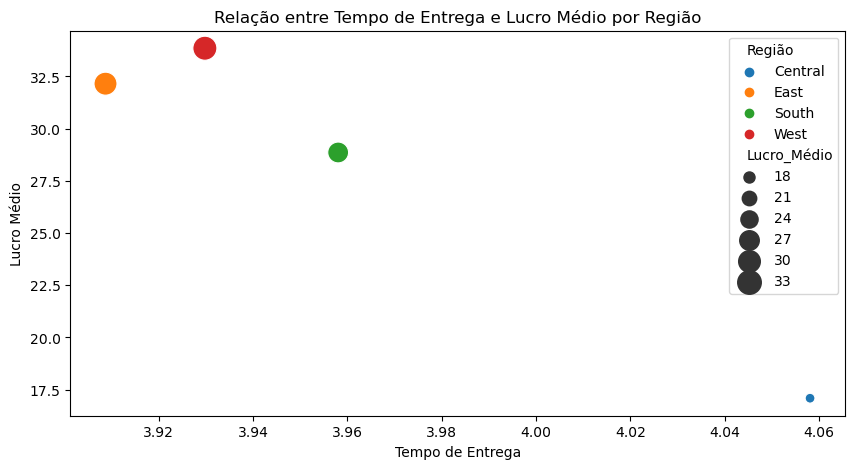

In [13]:
#Como o tempo de entrega (diferente entre a "Order Date" e "Ship Date") impacta nas vendas?
df['Tempo_Entrega'] = (df['Ship Date'] - df['Order Date']).dt.days
plt.figure(figsize=(10,5))
sns.scatterplot(x='Tempo_Entrega', y='Sales', data=df, color='blue')
plt.title('Relação entre Tempo de Entrega e Vendas')
plt.xlabel('Tempo de Entrega')
plt.ylabel('Vendas')
plt.show()

#Áreas com tempo de entrega mais rápido têm maiores lucros?
#1. Calculando a média de lucro por região e tempo de entrega
tabelaTempoEntrega = df.groupby('Region')['Tempo_Entrega'].mean().reset_index()
tabelaTempoEntrega = tabelaTempoEntrega.merge(df.groupby('Region')['Profit'].mean().reset_index(), on='Region')
tabelaTempoEntrega.columns = ['Região', 'Tempo_Entrega', 'Lucro_Médio']

#2. Plotando o gráfico
plt.figure(figsize=(10,5))
sns.scatterplot(x='Tempo_Entrega', y='Lucro_Médio', hue='Região', size='Lucro_Médio',sizes=(50, 300), data=tabelaTempoEntrega, legend='brief')
plt.title('Relação entre Tempo de Entrega e Lucro Médio por Região')
plt.xlabel('Tempo de Entrega')
plt.ylabel('Lucro Médio')
plt.show()

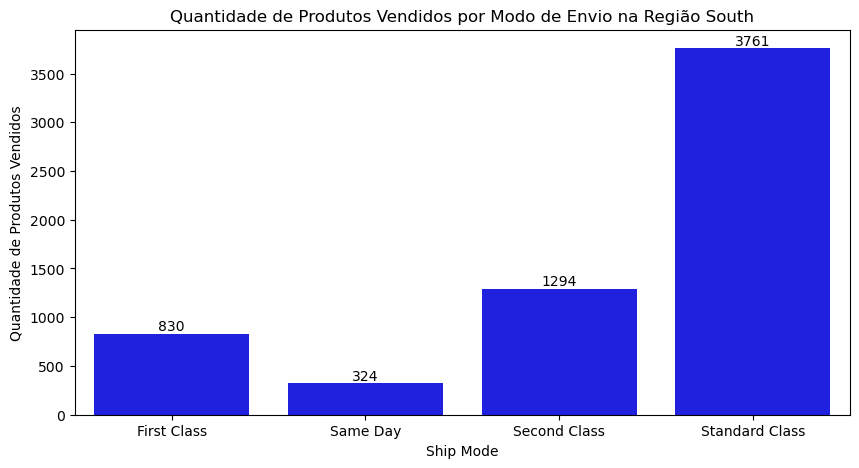

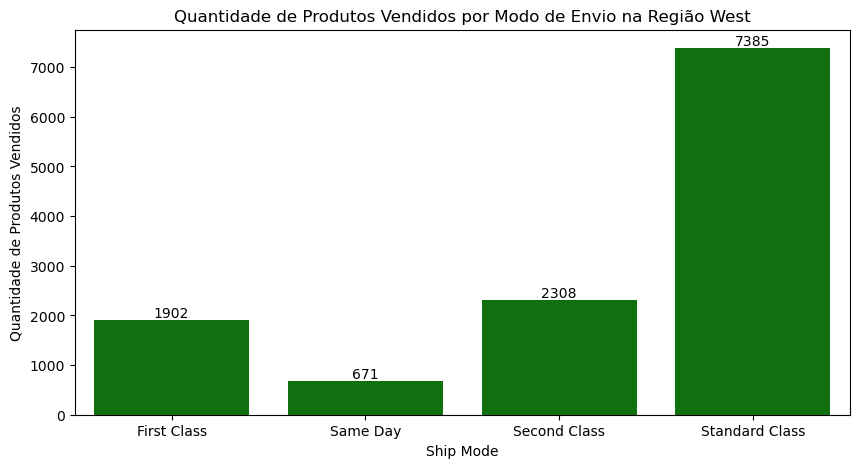

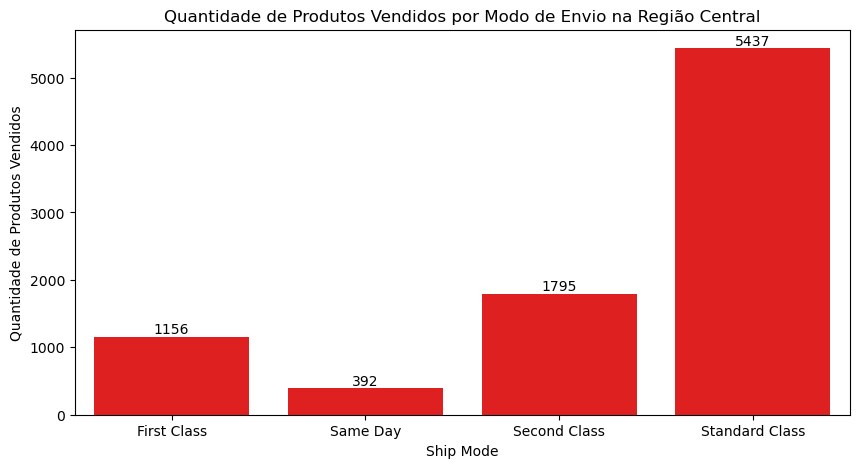

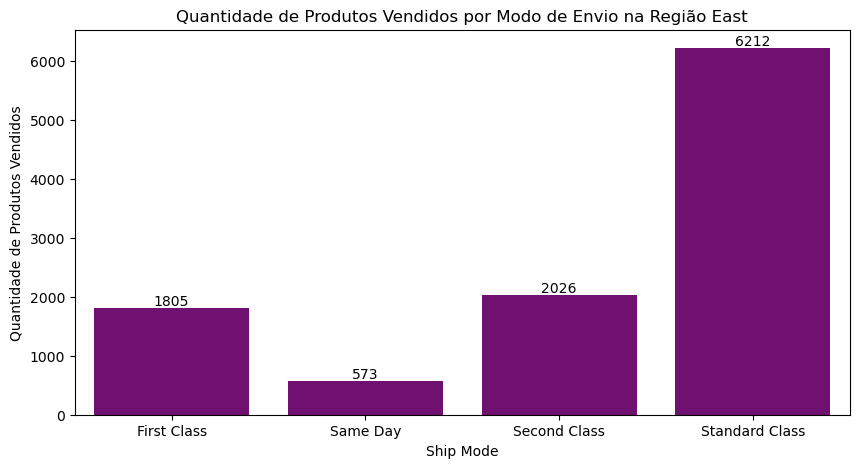

In [14]:
#Existe uma relação entre a região (por exemplo, "South", "West") e o modo de envio (Second Class, Standard Class, etc.) 
#que afeta o desempenho nas vendas?

tabelaRegiao = df.groupby(['Region','Ship Mode'])['Quantity'].sum().reset_index()
cores = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan'] # Lista de cores que será usada para os gráficos

# Loop para gerar um gráfico por região
for i, regiao in enumerate(df['Region'].unique()):
    df_aux = tabelaRegiao[tabelaRegiao['Region'] == regiao]
    plt.figure(figsize=(10, 5))
    aux = sns.barplot(x='Ship Mode', y='Quantity', data=df_aux, color=cores[i % len(cores)])
    plt.title(f'Quantidade de Produtos Vendidos por Modo de Envio na Região {regiao}')
    plt.ylabel('Quantidade de Produtos Vendidos')
    aux.bar_label(aux.containers[0]) # Adicionando os valores em cima das barras
    plt.show()